In [1]:
import bamboolib as bam #easy to do data manipulation and highly recommend going to https://bamboolib.8080labs.com/ and that will help you follow along
import pandas as pd #data manipulation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
import gensim


warnings.filterwarnings('ignore')
y=pd.read_csv('/Users/vaibhavarora/Documents/NEU/CPS/ALY 6040/Module 4/Reviews.csv')

In [2]:
y

            Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominato

In [3]:
y.shape

(568454, 10)

In [4]:
y.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [5]:
y= y.dropna()

In [6]:
y.shape

(568411, 10)

In [7]:
df=y.copy()

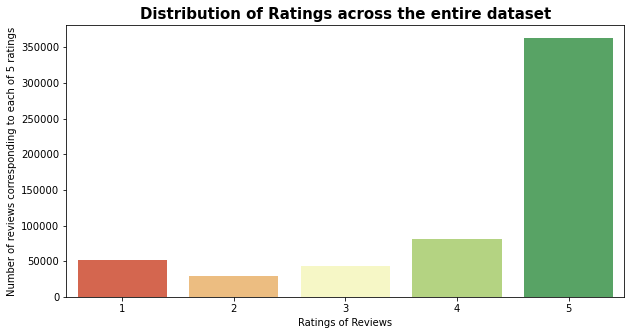

1     52264
2     29743
3     42638
4     80655
5    363111
Name: Score, dtype: int64


In [8]:
plt.figure(figsize=(10,5))
sns.countplot(df['Score'], palette=sns.color_palette("RdYlGn", 5))
plt.title("Distribution of Ratings across the entire dataset", fontweight='bold', fontsize=15)
plt.xlabel("Ratings of Reviews")
plt.ylabel("Number of reviews corresponding to each of 5 ratings")
plt.show();

print(df['Score'].value_counts().sort_index());

In [9]:
heading_1 = df[df["Score"]==1]["Summary"] # Extract only Summary of reviews
collapsed_heading_1 = heading_1.str.cat(sep=' ')

heading_2 = df[df["Score"]==2]["Summary"] # Extract only Summary of reviews
collapsed_heading_2 = heading_2.str.cat(sep=' ')

heading_3 = df[df["Score"]==3]["Summary"] # Extract only Summary of reviews
collapsed_heading_3 = heading_3.str.cat(sep=' ')

heading_4 = df[df["Score"]==4]["Summary"] # Extract only Summary of reviews
collapsed_heading_4 = heading_4.str.cat(sep=' ')

heading_5 = df[df["Score"]==5]["Summary"] # Extract only Summary of reviews
collapsed_heading_5 = heading_5.str.cat(sep=' ')

In [10]:
!pip install wordcloud


Word Cloud for Rating 1


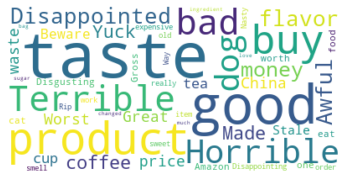


Word Cloud for Rating 2


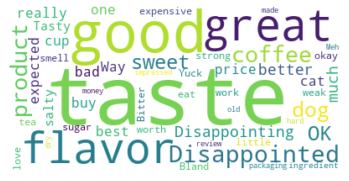


Word Cloud for Rating 3


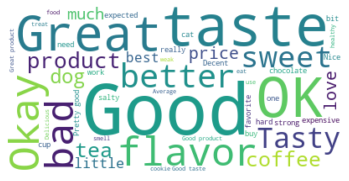


Word Cloud for Rating 4


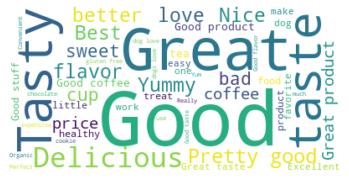


Word Cloud for Rating 5


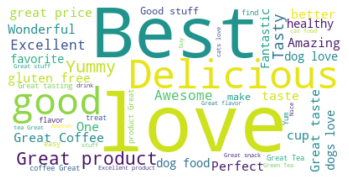

In [11]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["Subject","re","fw","fwd"])

print("Word Cloud for Rating 1")

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_1)

# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("\nWord Cloud for Rating 2")

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_2)

# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("\nWord Cloud for Rating 3")
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_3)

# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("\nWord Cloud for Rating 4")

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_4)

# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
     
print("\nWord Cloud for Rating 5")
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_5)

# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
df.shape

(568411, 10)

In [13]:
df = df.drop_duplicates(subset={"UserId","ProfileName","Time","Text"})

In [14]:
df.shape

(393919, 10)

In [15]:
#y = y.drop_duplicates(subset={"UserId","ProfileName","Time","Text"})

In [16]:
y.shape

(568411, 10)

In [17]:
train_set = y.loc[(y['Score'] > 3)]

In [18]:
train_set

            Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
5            6  B006K2ZZ7K   ADT0SRK1MGOEU                   Twoapennything   
6            7  B006K2ZZ7K  A1SP2KVKFXXRU1                David C. Sullivan   
...        ...         ...             ...                              ...   
568448  568449  B001EO7N10  A1F6BHEYB7R6R7                     James Braley   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominato

In [19]:
train_set.shape

(443766, 10)

In [20]:
train_set = train_set.head(10000)

In [21]:
train_set.shape

(10000, 10)

Bring in packages to get rid of Stopwords. This helps get rid of junk words that aren't meaningful

In [22]:
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
import string
from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vaibhavarora/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vaibhavarora/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Loop to strip out nouns

In [23]:
def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

Now use the loop to strip out nouns from the Text column

In [24]:
data_nouns = pd.DataFrame(train_set.Text.apply(nouns))

In [25]:
data_nouns

                                                    Text
0      Vitality food products quality product stew me...
2      confection centuries citrus gelatin nuts case ...
4      Great taffy price assortment yummy taffy Deliv...
5      hair taffy pound bag taffy flavors watermelon ...
6      saltwater taffy flavors candy None candies ver...
...                                                  ...
13085  coffee treat reviews hope pricing mistake bean...
13086  order roast espresso roast taste espresso brew...
13087  Coffee Bean Direct home coffee year darker roa...
13088  roasts roast coffee direct. < br / > site expl...
13089  ANOTHER GREAT WHOLE BEAN FROM COFFEE BEAN DIRE...

[10000 rows x 1 columns]

Add Stop Words to remove words that aren't useful to analysis but common

In [26]:

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people','youre', 'got', 'gonna', 'amazon','time', 'think', 'yeah', 'said','br']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)


Turn Data Set Into A Matrix To Look Into Reviews (you will see in the last line we are only looking at the Text field)

In [27]:
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_nouns.Text)


In [28]:
data_cv.shape

(10000, 12670)

In [29]:
data_dtmn = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtmn.index = data_nouns.index

In [30]:
data_dtmn

       02  0825305845  0836194942  09  0939165422  0939165562  0982207786  \
0       0           0           0   0           0           0           0   
2       0           0           0   0           0           0           0   
4       0           0           0   0           0           0           0   
5       0           0           0   0           0           0           0   
6       0           0           0   0           0           0           0   
...    ..         ...         ...  ..         ...         ...         ...   
13085   0           0           0   0           0           0           0   
13086   0           0           0   0           0           0           0   
13087   0           0           0   0           0           0           0   
13088   0           0           0   0           0           0           0   
13089   0           0           0   0           0           0           0   

       0xk6hzpjrkaed855hewp  10  100  ...  zojirushi  zola  zomg  zoo  zotz

In [31]:
!pip install -U gensim

In [32]:
from gensim import matutils, models
import scipy.sparse

In [33]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cv.vocabulary_.items())

Get ready to build model

In [34]:
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.040*"coffee" + 0.018*"food" + 0.015*"product" + 0.014*"cup" + 0.012*"price" + 0.011*"flavor" + 0.011*"chocolate" + 0.010*"taste" + 0.009*"cups" + 0.009*"dog"'),
 (1,
  '0.018*"tea" + 0.016*"flavor" + 0.014*"product" + 0.013*"taste" + 0.009*"sugar" + 0.007*"chips" + 0.007*"bag" + 0.006*"water" + 0.006*"snack" + 0.006*"salt"')]

In [48]:
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.015*"chocolate" + 0.014*"flavor" + 0.012*"product" + 0.012*"cookies" + 0.011*"chips" + 0.011*"taste" + 0.010*"bag" + 0.009*"snack" + 0.009*"salt" + 0.007*"sauce"'),
 (1,
  '0.028*"tea" + 0.017*"product" + 0.014*"taste" + 0.013*"flavor" + 0.013*"water" + 0.011*"milk" + 0.010*"sugar" + 0.007*"mix" + 0.006*"juice" + 0.006*"drink"'),
 (2,
  '0.058*"coffee" + 0.022*"food" + 0.019*"cup" + 0.015*"product" + 0.014*"flavor" + 0.013*"cups" + 0.013*"dog" + 0.013*"price" + 0.010*"taste" + 0.009*"treats"')]

In [36]:
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.091*"coffee" + 0.029*"cup" + 0.022*"flavor" + 0.020*"cups" + 0.014*"taste" + 0.011*"product" + 0.011*"price" + 0.011*"beans" + 0.010*"roast" + 0.010*"keurig"'),
 (1,
  '0.024*"product" + 0.013*"flavor" + 0.013*"chips" + 0.010*"taste" + 0.010*"salt" + 0.009*"bag" + 0.009*"sauce" + 0.008*"price" + 0.008*"com" + 0.007*"oil"'),
 (2,
  '0.037*"tea" + 0.022*"chocolate" + 0.019*"flavor" + 0.019*"sugar" + 0.018*"taste" + 0.016*"water" + 0.013*"milk" + 0.010*"product" + 0.008*"juice" + 0.008*"drink"'),
 (3,
  '0.034*"food" + 0.017*"dog" + 0.016*"cookies" + 0.012*"treats" + 0.010*"dogs" + 0.010*"product" + 0.009*"cat" + 0.009*"price" + 0.007*"treat" + 0.007*"ingredients"')]

In [37]:
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
import string
from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vaibhavarora/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vaibhavarora/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [38]:
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [39]:
data_nouns_adj = pd.DataFrame(train_set.Text.apply(nouns_adj))
data_nouns_adj

                                                    Text
0      several Vitality food products good quality pr...
2      confection few centuries light pillowy citrus ...
4      Great taffy great price wide assortment yummy ...
5      wild hair taffy pound bag taffy enjoyable many...
6      saltwater taffy great flavors soft chewy candy...
...                                                  ...
13085  coffee nice treat reviews modest hope pricing ...
13086  2nd order italian roast espresso good french r...
13087  pleased Coffee Bean Direct home coffee year da...
13088  dark roasts expresso particular roast dark dar...
13089  ANOTHER GREAT WHOLE BEAN FROM COFFEE BEAN DIRE...

[10000 rows x 1 columns]

In [40]:
cvna = CountVectorizer(stop_words=stop_words) #, max_df is used for removing data values that appear too frequently, also known as "corpus-specific stop words". 
data_cvna = cvna.fit_transform(data_nouns_adj.Text)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

       0100  02  04  062  0825305845  0836194942  09  0939165422  0939165562  \
0         0   0   0    0           0           0   0           0           0   
2         0   0   0    0           0           0   0           0           0   
4         0   0   0    0           0           0   0           0           0   
5         0   0   0    0           0           0   0           0           0   
6         0   0   0    0           0           0   0           0           0   
...     ...  ..  ..  ...         ...         ...  ..         ...         ...   
13085     0   0   0    0           0           0   0           0           0   
13086     0   0   0    0           0           0   0           0           0   
13087     0   0   0    0           0           0   0           0           0   
13088     0   0   0    0           0           0   0           0           0   
13089     0   0   0    0           0           0   0           0           0   

       0982207786  ...  zojirushi  zola

In [41]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [42]:
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.015*"good" + 0.013*"great" + 0.011*"food" + 0.010*"product" + 0.008*"flavor" + 0.008*"taste" + 0.006*"best" + 0.006*"little" + 0.005*"dog" + 0.005*"free"'),
 (1,
  '0.034*"coffee" + 0.018*"tea" + 0.016*"good" + 0.016*"great" + 0.013*"flavor" + 0.013*"cup" + 0.011*"product" + 0.010*"taste" + 0.009*"chocolate" + 0.008*"cups"')]

In [43]:
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.019*"food" + 0.013*"product" + 0.012*"good" + 0.011*"great" + 0.009*"dog" + 0.007*"free" + 0.006*"best" + 0.006*"treats" + 0.006*"price" + 0.006*"little"'),
 (1,
  '0.018*"flavor" + 0.017*"good" + 0.017*"great" + 0.010*"chocolate" + 0.010*"cookies" + 0.009*"chips" + 0.009*"taste" + 0.009*"product" + 0.008*"bag" + 0.008*"delicious"'),
 (2,
  '0.038*"coffee" + 0.020*"tea" + 0.017*"good" + 0.016*"great" + 0.015*"cup" + 0.013*"taste" + 0.013*"flavor" + 0.010*"product" + 0.009*"sugar" + 0.009*"cups"')]

In [44]:
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.028*"product" + 0.013*"free" + 0.013*"great" + 0.011*"price" + 0.010*"good" + 0.010*"com" + 0.009*"gluten" + 0.008*"mix" + 0.008*"oil" + 0.007*"store"'),
 (1,
  '0.047*"coffee" + 0.024*"tea" + 0.017*"cup" + 0.017*"flavor" + 0.015*"good" + 0.014*"great" + 0.014*"taste" + 0.010*"cups" + 0.009*"water" + 0.008*"sugar"'),
 (2,
  '0.023*"food" + 0.013*"great" + 0.013*"good" + 0.011*"dog" + 0.010*"chips" + 0.009*"product" + 0.008*"treats" + 0.007*"best" + 0.007*"salt" + 0.007*"healthy"'),
 (3,
  '0.021*"good" + 0.018*"chocolate" + 0.017*"great" + 0.014*"flavor" + 0.012*"hot" + 0.012*"cookies" + 0.011*"taste" + 0.008*"delicious" + 0.008*"little" + 0.008*"sweet"')]

In [47]:
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=50)
ldana.print_topics()

[(0,
  '0.018*"great" + 0.017*"good" + 0.014*"product" + 0.010*"flavor" + 0.010*"taste" + 0.007*"sugar" + 0.006*"price" + 0.006*"little" + 0.006*"free" + 0.006*"sweet"'),
 (1,
  '0.028*"food" + 0.014*"dog" + 0.009*"good" + 0.009*"product" + 0.008*"organic" + 0.008*"treats" + 0.008*"great" + 0.008*"dogs" + 0.007*"cat" + 0.007*"old"'),
 (2,
  '0.043*"coffee" + 0.023*"tea" + 0.018*"flavor" + 0.017*"good" + 0.017*"cup" + 0.014*"great" + 0.012*"taste" + 0.011*"chocolate" + 0.011*"chips" + 0.010*"cups"')]